In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
import astropy.coordinates as coord 
import astropy.units as u 
import ephem 
import sys 
from astropy.coordinates import Longitude 
import matplotlib.cm as cm
from astropy.coordinates import SkyCoord

In [2]:
#Literature rates
FongRate=270 #gpc^(-3)*yr^(-1)
FongRateMax=1850 #gpc^(-3)*yr^(-1)
FongRateMin=90 #gpc^(-3)*yr^(-1)
NakarRateMin=10 #gpc^(-3)*yr^(-1)
NakarRateMax=5*10**5 #gpc^(-3)*yr^(-1)
AbbotRateLow=12100 #gpc^(-3)*yr(-1) - strict upper limit for low spin BNS
AbbotRateHigh=12600 #gpc^(-3)*yr(-1) - strict upper limit for high spin BNS
CowardRate=1100 #gpc^(-3)*yr(-1) - beam corrected upper limit
CowardRateMax=1800 #gpc^(-3)*yr(-1) - max value, beam corrected upper limit
CowardRateMin=630 #gpc^(-3)*yr(-1) - min value, beam corrected upper limit
DoctorMax=10**7 #gpc^(-3)*yr(-1) - assuming no underlying galaxy flux, dimmer KN model
DoctorMin=2.4*10**4 #gpc^(-3)*yr(-1) - assuming no underlying galaxy flux, brightest KN model

In [11]:
#My rates
schechterRate=286 #gpc^(-3)*yr(-1)
catalogRate=223 #gpc^(-3)*yr(-1)

In [4]:
rangeArray=[20,40,60,80,100,120,140,160,180,200] #LIGO ranges in Mpc
rangeArray3=np.multiply(rangeArray,np.multiply(rangeArray,rangeArray)) #cubed range
volumeArray=(4/3)*np.pi*rangeArray3 #volume range
scaleArray=10**9/volumeArray #scaling from gpc^3=10**9 mpc^3

In [12]:
schechterRateArray=schechterRate/scaleArray
catalogRateArray=catalogRate/scaleArray

In [13]:
FongRateArray=FongRate/scaleArray
FongRateMaxArray=FongRateMax/scaleArray
FongRateMinArray=FongRateMin/scaleArray
NakarRateMinArray=NakarRateMin/scaleArray
NakarRateMaxArray=NakarRateMax/scaleArray
AbbotRateLowArray=AbbotRateLow/scaleArray
AbbotRateHighArray=AbbotRateHigh/scaleArray
CowardRateArray=CowardRate/scaleArray
CowardRateMaxArray=CowardRateMax/scaleArray
CowardRateMinArray=CowardRateMin/scaleArray
DoctorMaxArray=DoctorMax/scaleArray
DoctorMinArray=DoctorMin/scaleArray

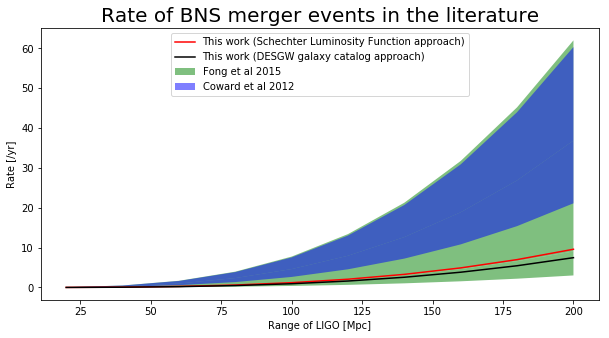

In [14]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
#Nakar
#ax.fill_between(rangeArray, NakarRateMinArray, NakarRateMaxArray, facecolor='orange', alpha=0.3,interpolate=True)
#Fong
ax.fill_between(rangeArray, FongRateArray, FongRateMaxArray, facecolor='green', alpha=0.5,interpolate=True)
ax.fill_between(rangeArray, FongRateArray, FongRateMinArray, facecolor='green', alpha=0.5,interpolate=True,label="Fong et al 2015")
#Abbot (plot only high spin BNS - small difference between low vs. high spin)
#ax.plot(rangeArray,AbbotRateHighArray,c='orange')
#Coward (beam corrected upper limits)
ax.fill_between(rangeArray, CowardRateArray, CowardRateMaxArray, facecolor='blue',alpha=0.5, interpolate=True)
ax.fill_between(rangeArray, CowardRateArray, CowardRateMinArray, facecolor='blue', alpha=0.5,interpolate=True,label="Coward et al 2012")
#Doctor (assuming no underlying galaxy flux)
#ax.fill_between(rangeArray, DoctorMaxArray, DoctorMinArray, facecolor='red', alpha=0.5,interpolate=True)
ax.plot(rangeArray,schechterRateArray,c='red',label="This work (Schechter Luminosity Function approach)")
ax.plot(rangeArray,catalogRateArray,c='black',label="This work (DESGW galaxy catalog approach)")
ax.set_title("Rate of BNS merger events in the literature",fontdict=font)
ax.set_xlabel("Range of LIGO [Mpc]")
ax.set_ylabel("Rate [/yr]")
ax.legend(loc=9,ncol=1)